Изучаем датасет по поездкам такси в Нью-Йорке. Загружаем его из внешнего источника kaggle

In [ ]:
from google.colab import files
uploaded = files.upload()

Считываем датасет в датафрейм

In [ ]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

df = pd.read_csv('train.zip', compression='zip', header=0, sep=',', quotechar='"')

Выведите первые 7 строк датасета

,id,vendor_id,pickup_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
96469,id0190469,2,2016-01-01 00:00:17,5,-73.981743,40.719158,-73.938828,40.829182,N,849
223872,id1665586,1,2016-01-01 00:00:53,1,-73.985085,40.747166,-73.958038,40.717491,N,1294
713067,id1210365,2,2016-01-01 00:01:01,5,-73.965279,40.801041,-73.947479,40.815170,N,408
652463,id3888279,1,2016-01-01 00:01:14,1,-73.982292,40.751331,-73.991341,40.750340,N,280
722901,id0924227,1,2016-01-01 00:01:20,1,-73.970108,40.759800,-73.989357,40.742989,N,736


Удалите из датафрейма столбец dropoff_datetime, как избыточную информацию

Отсортируйте датафрейм по столбцу pickup_datetime с помощью функции sort_values

Разбейте датасет на обучающую train_df и тестовую часть test_df, используя срезы датафрейма на границе 10**6

Определите размер тестовой выборки с помощью функции len

Постройте гистограмму распределения длительности поездки в обучающей выборке. Посмотрите на ее характер, меняя параметр bins

Постройте гистограмму распределения длительности поездки в обучающей выборке, используя функцию numpy log1p. Как изменился вид распределения?

Создайте в обучающей и тестовой выборках новые столбцы log_trip_duration как результат применения функции log1p к столбцу trip_duration

Преобразуем формат времени признака pickup_datetime в тестовой и обучающей выборках с помощью функции pandas to_datetime

Визуализируем число поездок по дням. Для этого извлечем из столбца pickup_datetime дату с помощью функции apply(lambda x: x.date()) в переменную dates

Получим график

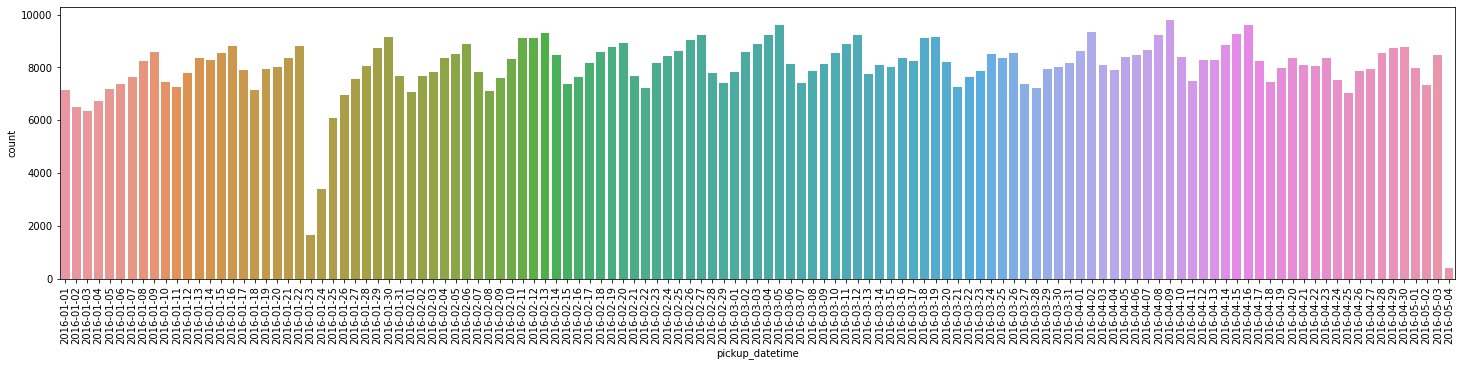

In [ ]:
plt.figure(figsize=(25, 5))
data_count_plot = sns.countplot(x = dates)
data_count_plot.set_xticklabels(data_count_plot.get_xticklabels(), rotation=90);

Выполните группировку обучающей выборки по значению dates. Выведите график средней длительности поездок по дням недели.
Для визуализации используем библиотеку seaborn
sns.relplot(data=group_by_date.log_trip_duration.aggregate('mean'), kind='line')

In [ ]:
group_by_date =

In [ ]:
sns.relplot(data=group_by_date.log_trip_duration.aggregate('mean'), kind='line')

Опишем функцию, подготавливающую данные для обучения. Выполним конкатенацию столбцов дня недели и часа поездки.

In [ ]:
def create_features(data_frame):
    X = pd.concat(
        [
         data_frame.pickup_datetime.apply(lambda x: x.timetuple().tm_yday),
         data_frame.pickup_datetime.apply(lambda x: x.hour)
        ], axis=1, keys=['day', 'hour']
    )
    return X, data_frame.log_trip_duration

Применим функцию create_features для формирования X_train, y_train и X_test, y_test

Посмотрим на получившуюся выборку X_train

Преобразуем признак hour в категориальный признак

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [ ]:
ohe = ColumnTransformer([("One Hot", OneHotEncoder(sparse=False), [1])], remainder='passthrough')

Применяем категориальный признак для изменения обучающей выборки

In [ ]:
X_train = ohe.fit_transform(X_train)

Посмотрите новое представление X_train и его размер после применения one-hot кодирования

In [ ]:
X_train.shape

(1000000, 25)

In [ ]:
X_test = ohe.fit_transform(X_test)

Выполните обучение модели линейной регрессии. Выполните предсказание модели и оцените ошибку по выбранной метрике.

Выполните обучение модели k ближайших соседей. Выполните предсказание модели и оцените ошибку по выбранной метрике.

Сравните качество обучения двух моделей